In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
chipo = pd.read_csv('chipotle.txt', '\t')
#print(chipo.head(5))

In [3]:
chipo.head(10)   #top_x(self, count)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [4]:
print(len(chipo))  #count(self)

4622


In [5]:
#chipo.shape

In [6]:
chipo.info() #info(self)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [7]:
print(len(chipo.columns)) #num_column(self)

5


In [8]:
chipo.columns  #print_columns(self)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [9]:
#most_ordered_item(self):
most_ordered_items = chipo['item_name'].value_counts().rename_axis('items').reset_index(name='orders')

mostordered_item = most_ordered_items['items']
mostordered_item[0]

'Chicken Bowl'

In [10]:
chipo.columns[0:3]

Index(['order_id', 'quantity', 'item_name'], dtype='object')

In [11]:
chipo['quantity'].sum() #total_item_orders(self)

4972

In [12]:
chipo['item_price'] = chipo['item_price'].str.slice(1).astype(float)
#total_sales(self)->float:


In [13]:
chipo.info() #total_sales(self) -> float:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [14]:
#num_orders(self) -> int:

print(chipo.order_id.unique())
len(chipo.order_id.unique()) 

[   1    2    3 ... 1832 1833 1834]


1834

In [15]:
#average_sales_amount_per_order(self) -> float:

new_df = chipo.copy()
new_df['total_sale_ofitem'] = chipo["quantity"] * chipo["item_price"]
new_df


,order_id,quantity,item_name,choice_description,item_price,total_sale_ofitem
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


In [16]:
new2_df = new_df.groupby('order_id')['total_sale_ofitem'].sum().reset_index(name ='total sale of the order')
new2_df

,order_id,total sale of the order
0,1,11.56
1,2,33.96
2,3,12.67
3,4,21.00
4,5,13.70
...,...,...
1829,1830,23.00
1830,1831,12.90
1831,1832,13.20
1832,1833,23.50


In [17]:
#average_sales_amount_per_order(self) -> float:
new2_df['total sale of the order'].mean()

21.39423118865867

In [18]:
#num_different_items_sold(self) -> int:
chipo['item_name'].nunique()


50

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
import seaborn as sns

In [21]:
items_pop = chipo['item_name'].value_counts().rename_axis('items').reset_index(name='orders')

items_pop


,items,orders
0,Chicken Bowl,726
1,Chicken Burrito,553
2,Chips and Guacamole,479
3,Steak Burrito,368
4,Canned Soft Drink,301
5,Steak Bowl,211
6,Chips,211
7,Bottled Water,162
8,Chicken Soft Tacos,115
9,Chicken Salad Bowl,110


In [22]:
items_5_pop = items_pop.head(5)
items_5_pop

,items,orders
0,Chicken Bowl,726
1,Chicken Burrito,553
2,Chips and Guacamole,479
3,Steak Burrito,368
4,Canned Soft Drink,301


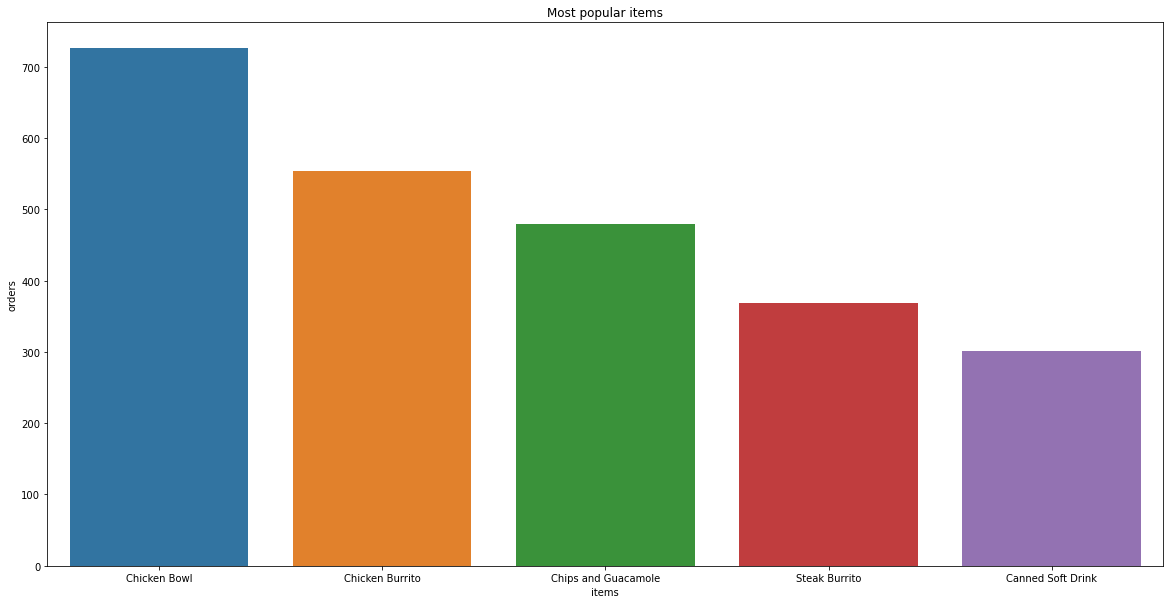

In [23]:
plt.figure(figsize=(20, 10))
sns.barplot(x = items_5_pop['items'], y = items_5_pop['orders']).set_title('Most popular items')
plt.show()

In [24]:
#scatter_plot_num_items_per_order_price(self) -> None:
chipo['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64